In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [5]:
feature_names = boston.feature_names

In [6]:
target = boston.target

In [7]:
x = pd.DataFrame(data, columns = feature_names)

In [8]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y = pd.DataFrame(target, columns = ['price'])

In [10]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
param = [{'n_estimators':1000,
         'max_depth':12,
         'random_state':42}]

In [15]:
rfr = RandomForestRegressor()

In [16]:
rfr.fit(x_train, y_train.values[:, 0])

RandomForestRegressor()

In [17]:
y_pred = rfr.predict(x_test)

In [18]:
check_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()}, columns=['y_test', 'y_pred'])

In [19]:
check_test.head(10)

,y_test,y_pred
173,23.6,23.087
274,32.4,31.462
491,13.6,16.419
72,22.8,23.609
452,16.1,17.209
76,20.0,21.215
316,17.8,19.850
140,14.0,14.996
471,19.6,21.361
500,16.8,20.848


In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test, y_pred)

0.876706442076264

In [22]:
# ошибка больше чем в 1 задании (0.7112260057484929)
# получается линейная регрессия подходит лучше

In [23]:
RandomForestRegressor??

In [25]:
importance = rfr.feature_importances_

In [26]:
from matplotlib import pyplot

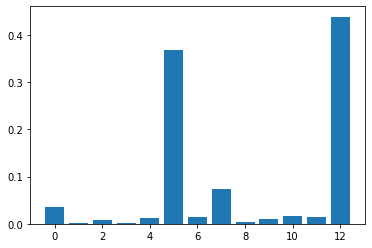

In [27]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [33]:
import seaborn as sns

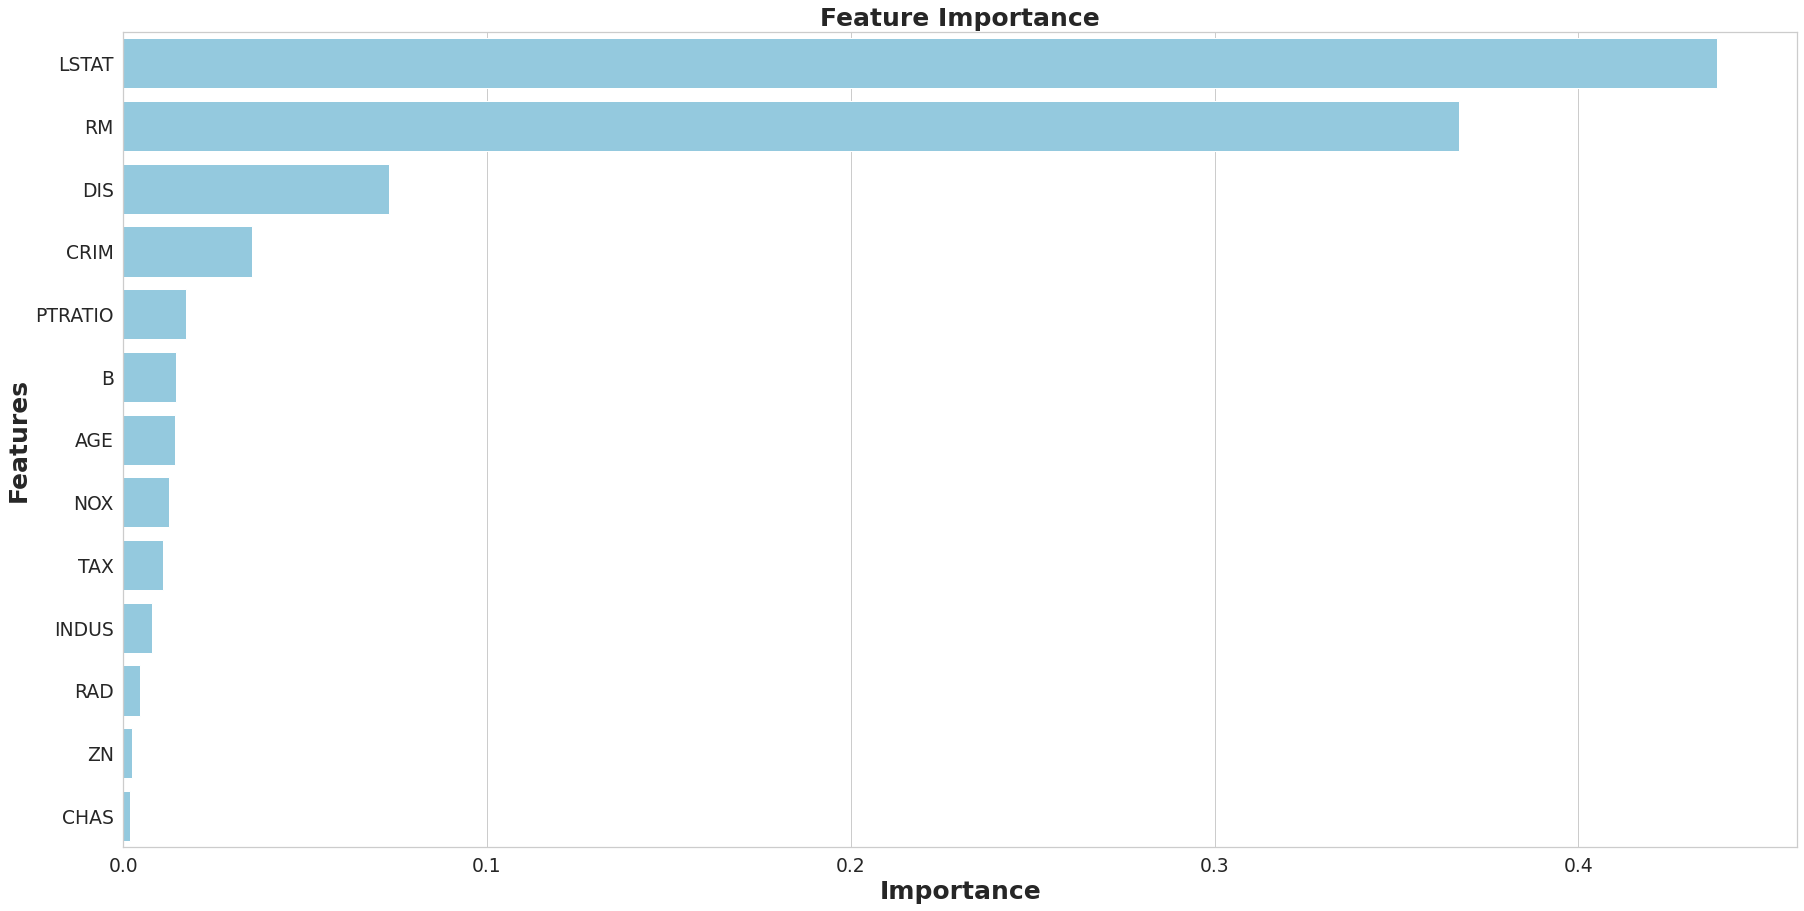

None

,Features,Importance
0,LSTAT,0.438219
1,RM,0.367290
2,DIS,0.072960
3,CRIM,0.035352
4,PTRATIO,0.017389
5,B,0.014587
6,AGE,0.014178
7,NOX,0.012646
8,TAX,0.010851
9,INDUS,0.007782


In [34]:
feats = {}
for feature, importance in zip(x.columns, rfr.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = pyplot.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
pyplot.xlabel('Importance', fontsize=25, weight = 'bold')
pyplot.ylabel('Features', fontsize=25, weight = 'bold')
pyplot.title('Feature Importance', fontsize=25, weight = 'bold')
display(pyplot.show())
display(importances)